#  Project 3: Harris Corner Detection and Matching

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from utils import plotFigureGray, plotFigure
from student_code import harris_corners, get_keypoints

## Open Two images for matching. Convert them into grayscale
### Take two similar images and add the photos to folder data. Rename these images as img1.jpg, and img2.jpg

In [4]:
img1 = cv2.imread('../data/image1.jpg')
img2 = cv2.imread('../data/image2.jpg')



gray1= cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
# gray1 = np.float32(gray1)

gray2= cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
# gray2 = np.float32(gray2)

# img1 = img1[...,::-1]
# img2 = img2[...,::-1]

# plt.imshow(img1)

Text(0.5, 1.0, 'Image2')

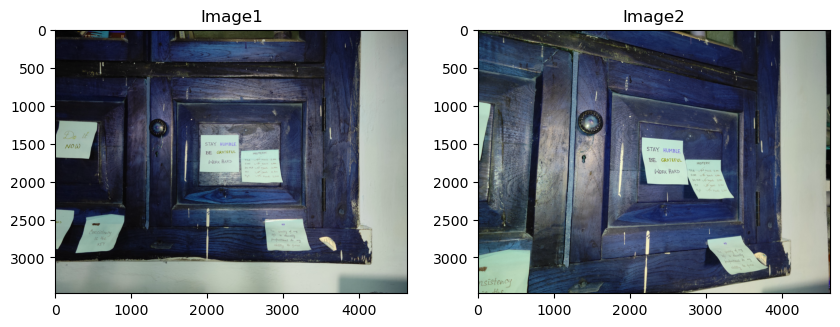

In [7]:
f,ax = plt.subplots(1,2, figsize=(10,10))

ax[0].imshow(img1)
ax[0].set_title('Image1')

ax[1].imshow(img2)
ax[1].set_title('Image2')

# Get Harris Corners, normalize the corner values between 0 and 255. 

number of corners before thresholding = 329126
number of corners after thresholding = 10531
number of corners before thresholding = 328785
number of corners after thresholding = 10066


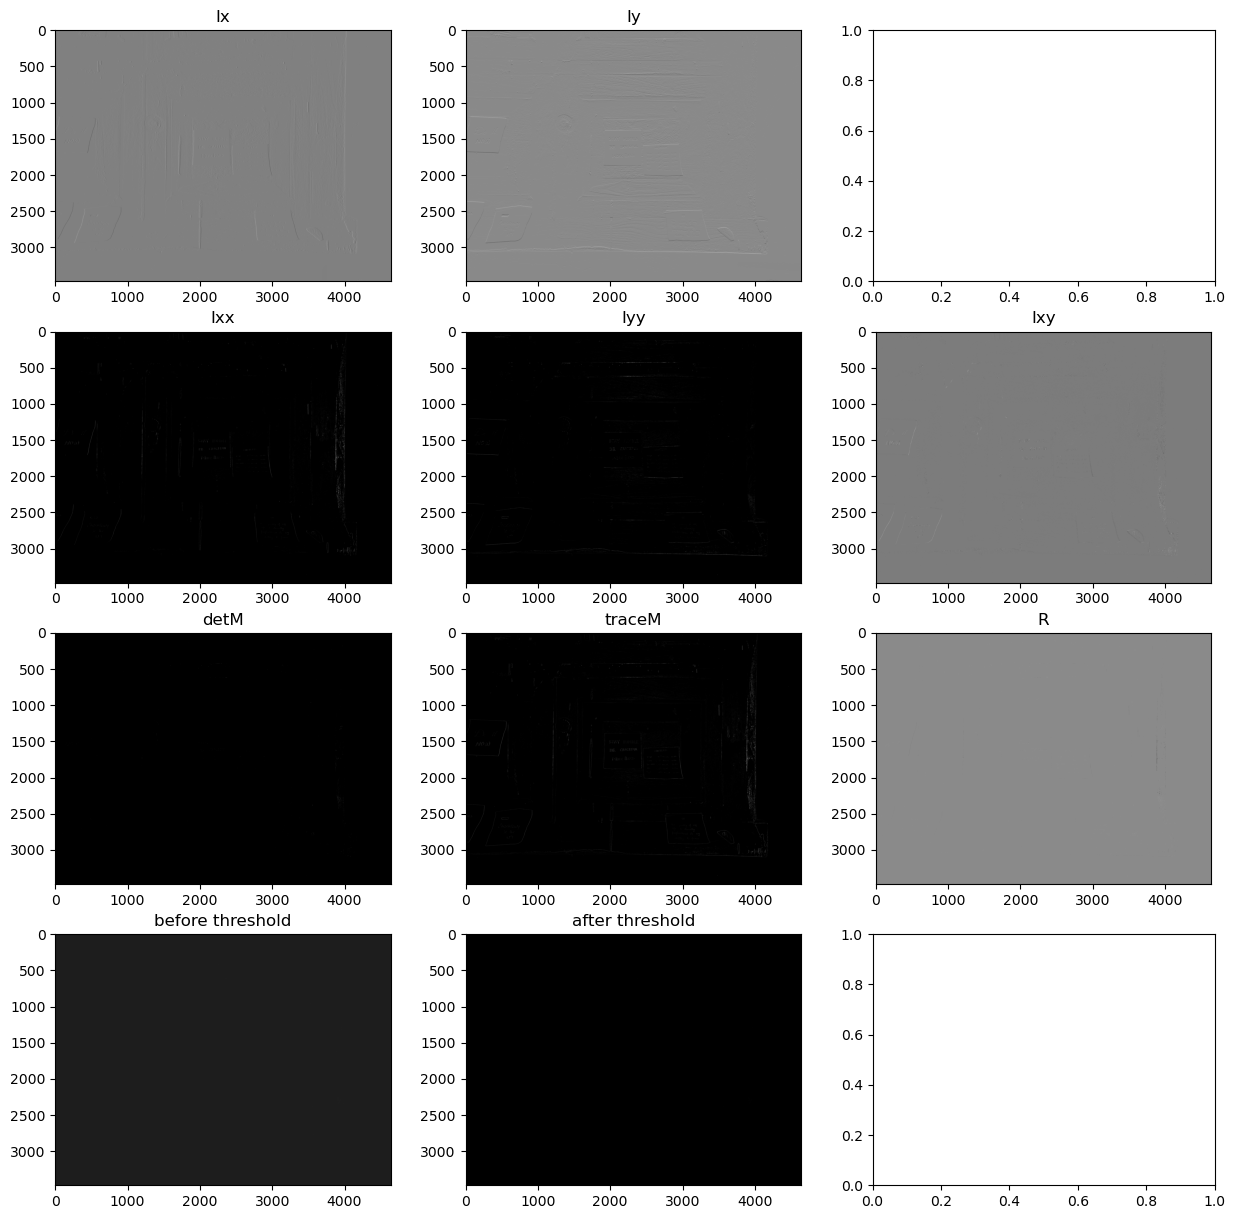

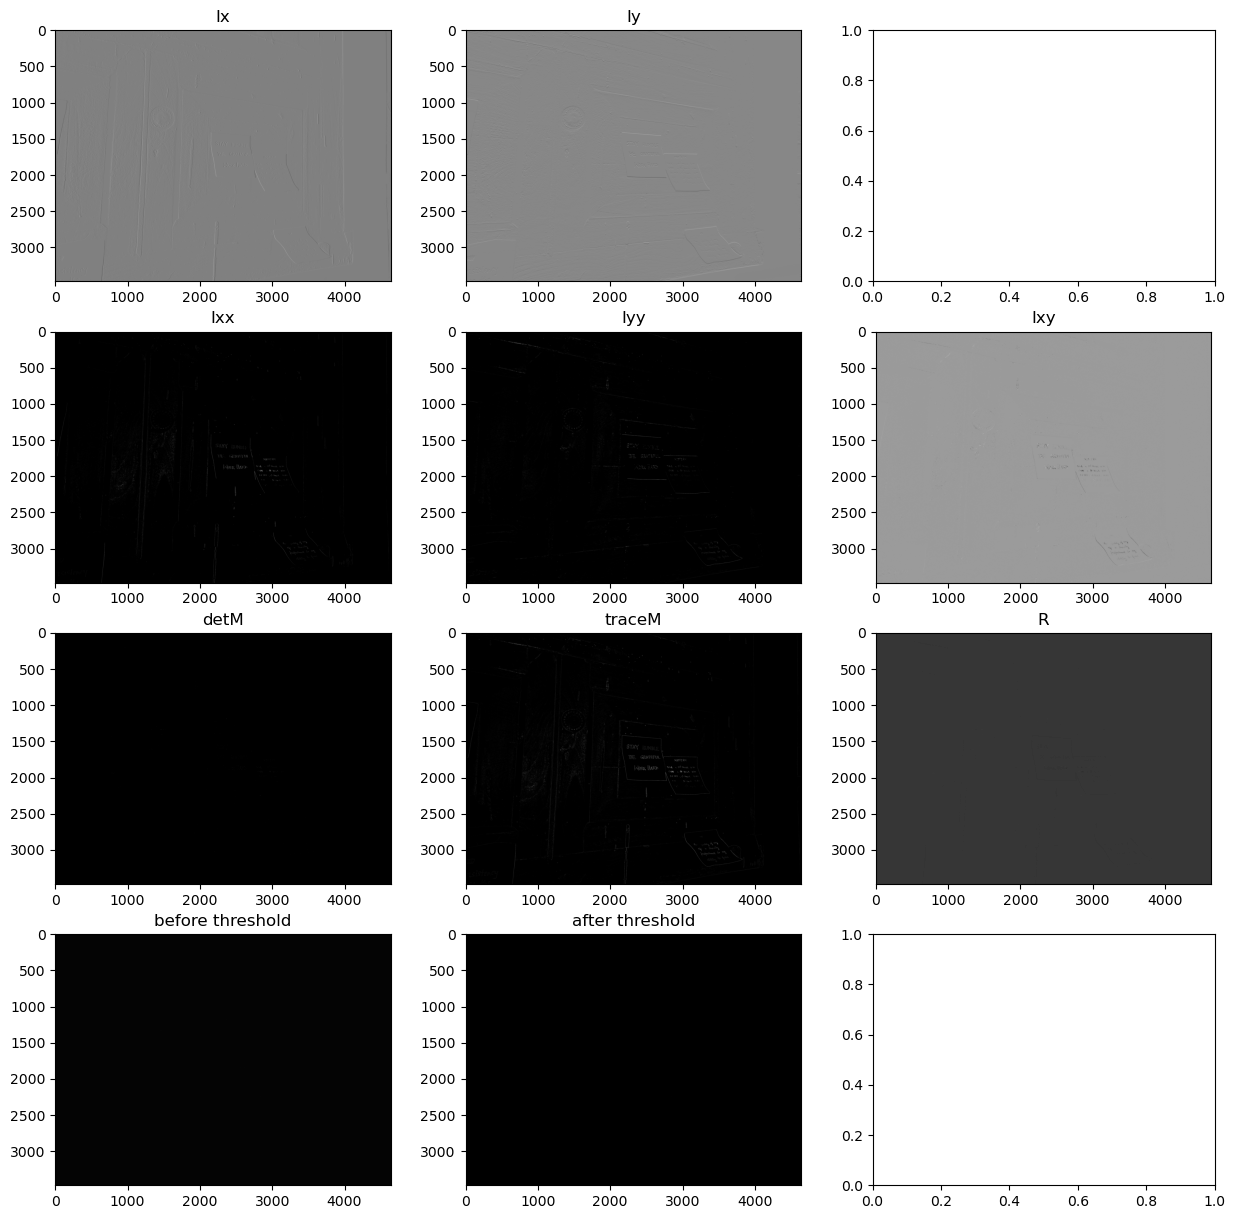

In [8]:
corners1, Ix1, Iy1 = harris_corners(img1, window_size=3, alpha=0.04, threshold=1e-3, nms_size=5)
corners2, Ix2, Iy2 = harris_corners(img2, window_size=3, alpha=0.04, threshold=1e-3, nms_size=5)

In [9]:
corners1 = cv2.normalize(corners1, corners1, alpha=0, beta=255,
                       norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
corners2 = cv2.normalize(corners2, corners2, alpha=0, beta=255,
                       norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Set the threshold for corners and generate key points from these corners

In [10]:
threshold = 80
kp1 = get_keypoints(corners1, Ix1, Iy1, threshold)
kp2 = get_keypoints(corners2, Ix2, Iy2, threshold)

keypoint = ( 436 2240 ) corners[i,j] = 121 threshold = 80
keypoint = ( 436 2265 ) corners[i,j] = 136 threshold = 80
keypoint = ( 453 3134 ) corners[i,j] = 95 threshold = 80
keypoint = ( 625 2365 ) corners[i,j] = 255 threshold = 80
keypoint = ( 626 2355 ) corners[i,j] = 124 threshold = 80
keypoint = ( 965 3532 ) corners[i,j] = 99 threshold = 80
keypoint = ( 971 3532 ) corners[i,j] = 139 threshold = 80
keypoint = ( 1327 3945 ) corners[i,j] = 87 threshold = 80
keypoint = ( 1328 3955 ) corners[i,j] = 101 threshold = 80
keypoint = ( 1342 3929 ) corners[i,j] = 137 threshold = 80
keypoint = ( 1401 1405 ) corners[i,j] = 103 threshold = 80
keypoint = ( 1529 2026 ) corners[i,j] = 99 threshold = 80
keypoint = ( 1535 2103 ) corners[i,j] = 98 threshold = 80
keypoint = ( 1567 177 ) corners[i,j] = 91 threshold = 80
keypoint = ( 1627 2053 ) corners[i,j] = 103 threshold = 80
keypoint = ( 1629 3879 ) corners[i,j] = 81 threshold = 80
keypoint = ( 1630 2289 ) corners[i,j] = 103 threshold = 80
keypoint = (

# Draw the key points. The line (radius) depicts the gradient

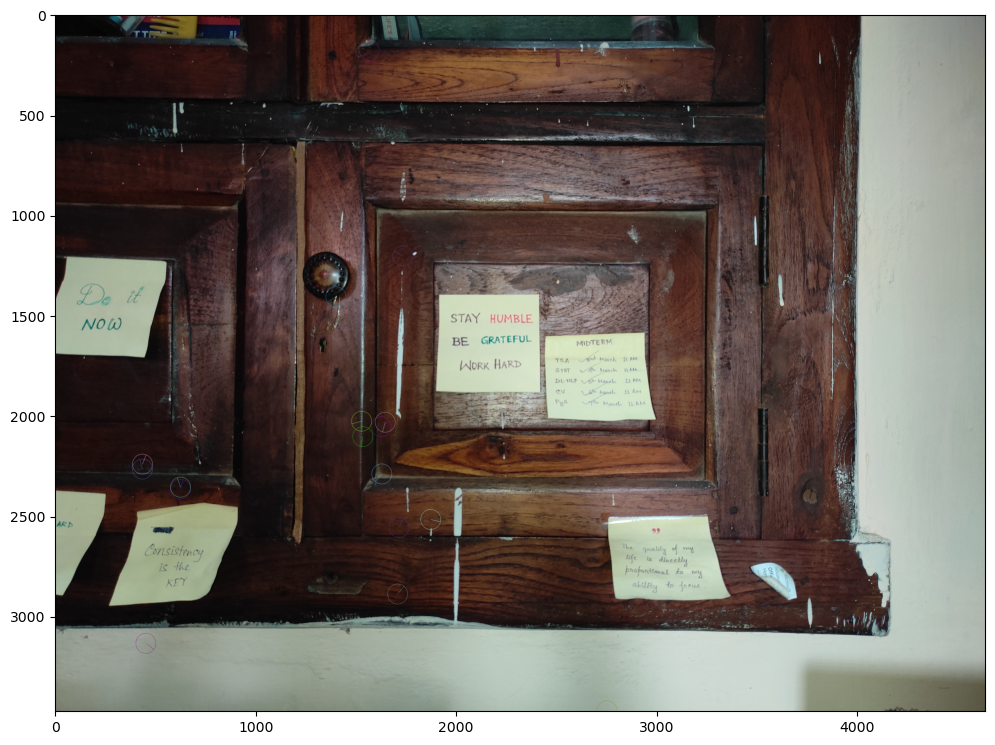

In [11]:
img1_copy = img1.copy()
cv2.drawKeypoints(img1, kp1, img1_copy, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plotFigure(img1_copy,12)
plt.show()   
# # plt.imshow(gray1, cmap="gray")

# plt.imshow(img1)

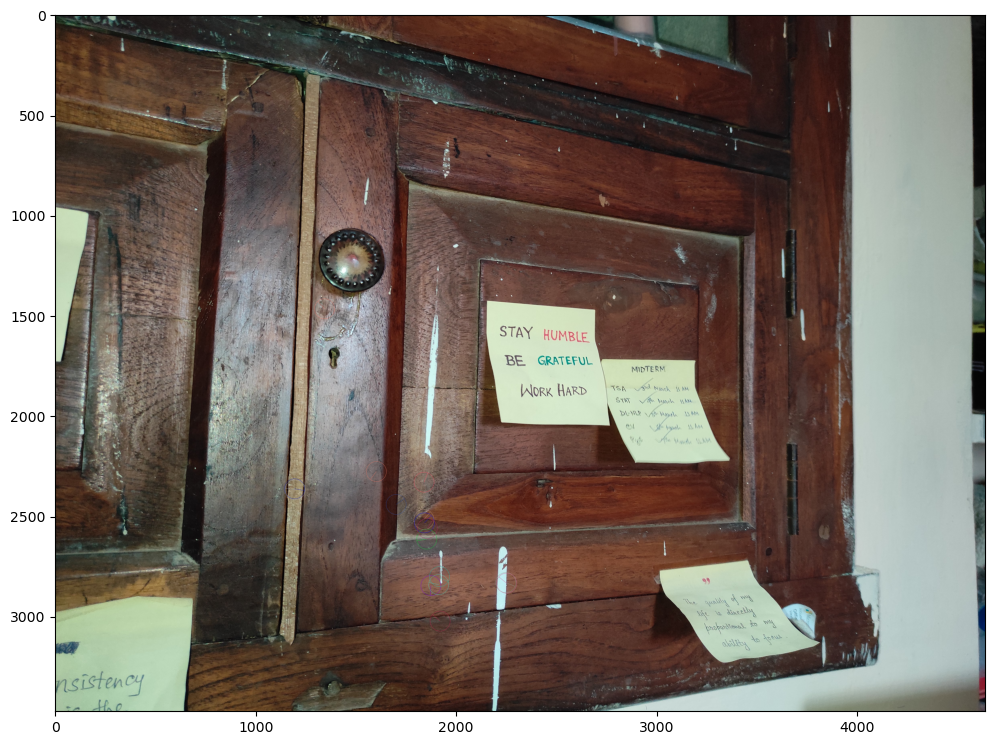

In [12]:
img2_copy = img2.copy()
cv2.drawKeypoints(img2, kp2, img2_copy,
                          flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plotFigure(img2_copy,12)
plt.show()   

# From these key points, generate SIFT descriptors. Then match these descriptors



In [13]:
# create sift instance
sift = cv2.SIFT_create()
# get descriptors

descriptors1 = sift.compute(img1_copy, kp1)[1]
descriptors2 = sift.compute(img2_copy, kp2)[1]



# get matches
bfm = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bfm.match(descriptors1, descriptors2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = np.array([])

img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:100], img3, flags=2)



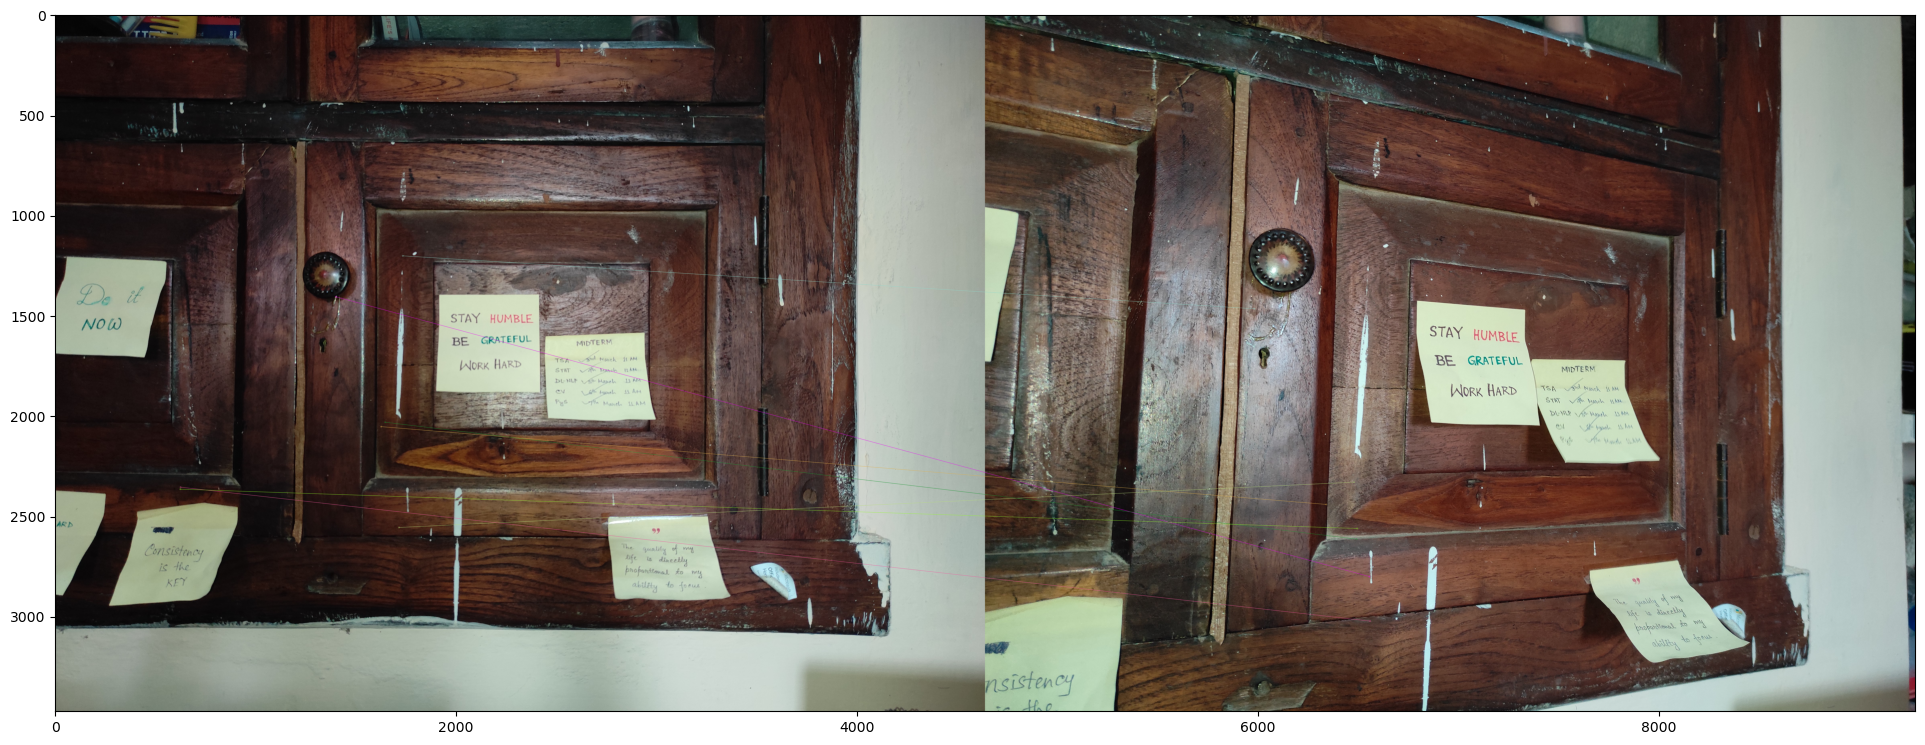

True

In [14]:
plotFigure(img3,24)
plt.show() 
cv2.imwrite('../results/matched.png', img3)
